# Part II - (Slide Explanatory  analysis of Melbourne Housing)
## by (Emmanuel Mutegi) 


## Investigation Overview

> This presentation aims at polishing out the the interesting insights from the the exploration stage which includes:

>The positive Relationship between Price , Distance and Types of residential

> Interesting Interaction between Type,price and Regions?

> The positive relationship between regions and price?

> Prices interaction with Number of bathrooms


## Dataset Overview

> The entire melbourne dataset is comprised of 21 variables with 8 variables as characters or strings. Before moving onto the effect on the target variable (Price) by those 8 variables. Every row in the dataset denotes information about property (house, townhouse etc) , price it is sold for, seller information and more characteristics such as number of bedrooms, location (latitude, longitude etc)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [21]:
# load in the dataset into a pandas dataframe
melb_df = pd.read_csv('melb_data.csv')
melb_df['Type'] = melb_df['Type'].replace(['h','u','t'],['House','Unit','TownHouse'])
Region_count=melb_df['Regionname'].value_counts()
Region_order=Region_count.index
base_color=sb.color_palette()[0]

## The positive Relationship between Price ,Distance and Types of residential

>From univarite and bivariate Type House(cottage,villa,terrance) had dorminated in prices which is also the case here with top prices seen clearly and far streched to right which i suppose is beacuse these are sigle homed houses sitting on a single percel of land. Unit(duplex) also here depicts that they are price friendly with Townhouse slightly higher than units

>In terms of Distance one can clearly observe that both Units and TownHouse are closer to Cbd which is true since most of these structures are built for business in the industrial areas thus it hard to find alot of single houses like the case with Type House where they are quite distributed with some very far from CBD, at ceteris paribus Type house is the most dorminant across the regions


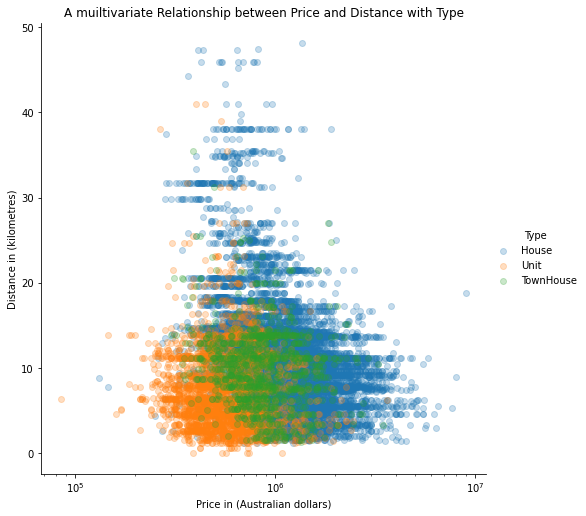

In [10]:
pg = sb.FacetGrid(data = melb_df, hue = 'Type', height = 7)
pg.map(plt.scatter, 'Price', 'Distance',alpha=1/4)
pg.add_legend()
plt.xscale('log')# transforming the xaxis which is price
plt.title('A muiltivariate Relationship between Price and Distance with Type');
plt.ylabel('Distance in (kilometres)')
plt.xlabel('Price in (Australian dollars)');


## Interesting Interaction between Type,price and Regions

>The Southern metropolitan region covers most of the wealthiest areas of Melbourne, only a few traditional Labor areas and that why all the Types of residentials are found in large numbers in the region with Type House dorminating and interestingly TownHouse second and factoring the population of Over 1 million which is quite reasonable to accommodate more residents on multi-floor buildings and this is seen across (south,west,east and north). In 2021 most people lived in separate houses (73.4%), rather than flats, apartments or other dwelling types in Victoria and that is clearly seen in our visuals where single houses are dorminant.

> Unit Type has relative prices even closer to the mean compaired to Townhouse while House prices are higher above the mean in most regions apart from western Victoria

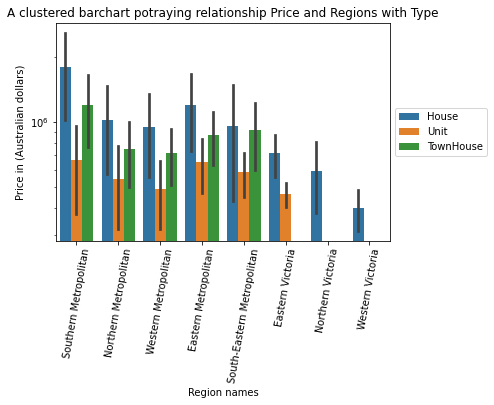

In [19]:
# plottng
sb.barplot(data=melb_df, x='Regionname', y='Price',hue='Type',ci='sd',order=Region_order )
plt.xticks(rotation=80);
plt.yscale('log')# scaling the yaxis
plt.title('A clustered barchart potraying relationship Price and Regions with Type')
plt.ylabel('Price in (Australian dollars)');
plt.xlabel('Region names')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

## The relationship between regions and price
>Prices vary among diferent regions with southern having the highest median and western victoria trailing,this means that class economy and income of people living in southern metropolitan is better than the rest and also there is less investment in real estate thus location is very crucial in this business.
> The distribution of prices across the regions is negatively skewed apart from (east,west and north) of Victoria which look fairly symmetrical


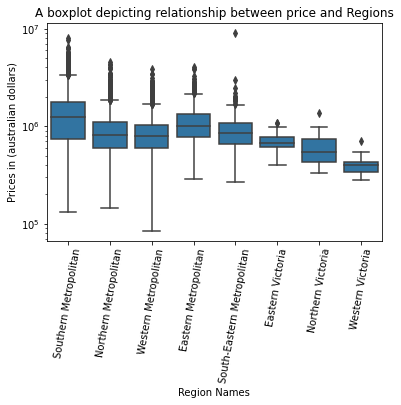

In [24]:
# boxplot
sb.boxplot(data=melb_df, x='Regionname', y='Price', color=base_color,order=Region_order)
plt.xticks(rotation=80);
plt.yscale('log')#scaling y axis
plt.title('A boxplot depicting relationship between price and Regions')
plt.xlabel('Region Names')
plt.ylabel('Prices in (australian dollars)');


## Prices interaction with Number of bathrooms
>In the left scatter plot the degree of variability in the data and strength of the relationship is fairly unclear, after employing transparency and jitter one can see that there is a positive non-linear relationship( that's ‘as x increases, y increases rapidly at first and then more slowly) between number of bathrooms and price where 1 bedroom is more concentrated and it has one of the highest price point which I suppose is an outlier and interestingly more than 5 bedrooms buldings have less concentration and ironically the structures do not have the top pricing factoring they're big buildings

>Most high prices fall under 1 to 4 bedrooms

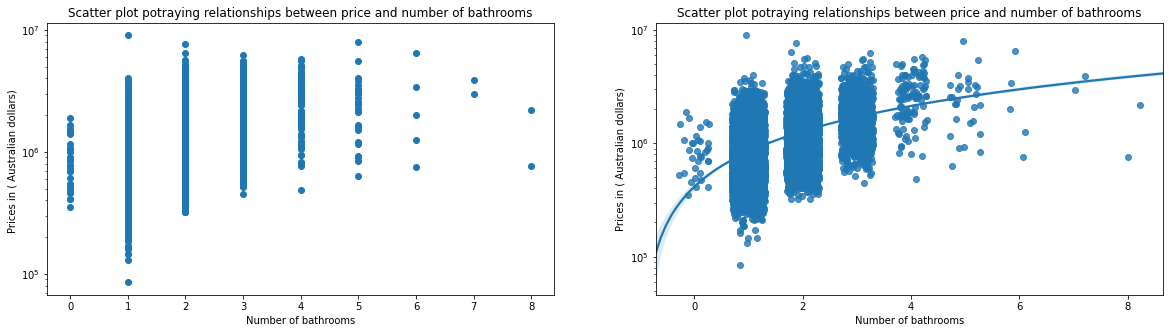

In [25]:
# setting the figure size
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
plt.scatter(data=melb_df,x='Bathroom',y='Price');
plt.title('Scatter plot potraying relationships between price and number of bathrooms')
plt.xlabel('Number of bathrooms')
plt.ylabel('Prices in ( Australian dollars) ')
plt.yscale('log')

plt.subplot(1,2,2)
sb.regplot(data=melb_df,x='Bathroom',y='Price',x_jitter=0.3,truncate=False)
plt.title('Scatter plot potraying relationships between price and number of bathrooms')
plt.xlabel('Number of bathrooms')
plt.ylabel('Prices in ( Australian dollars)')
plt.yscale('log')

In [27]:
!jupyter nbconvert Part_II_explanatory_analysis.ipynb --to slides --post serve --no-input --no-prompt

The system cannot find the file specified.


In [ ]:
jupyter nbconvert Part_II_explanatory_analysis .ipynb --to slides --reveal-prefix reveal.js --post serve